# Dzień drugi DWthon - Hack Outside the Box 

## Celem jest poznać zasadę Pareto w praktyce!


Staniemy dzisiaj na głowie 🤸, ale dzięki temu zobaczysz, że istnieje reguła, kiedy można robić mniej, ale dostawać więcej! Brzmi nierealistycznie? Jest tylko jeden sposób, aby się przekonać :)   

Niestety zwykle mamy na odwrót, robimy więcej i dostajemy mniej (wpadamy w tak zwane "czarne dziury"). Dlaczego tak jest? Wybranie właściwych rzeczy nie jest łatwe. W tej lekcji należy sobie przede wszystkim uświadomić, że taka reguła istnieje! W kolejnej zobaczysz, jak ML moż być pomocny w podpowiadaniu Ci, które rzeczy są najwłaściwsze w danym kontekście :) 

### Uwaga! 

Jeśli napotkasz trudności podczas wykonywania zadań z tego notebooka, to koniecznie napisz w kanale [dwthon_day2](https://bit.ly/3eh85Ov)

Pamiętaj, aby szczegółowo doprecyzować, z czym masz problem. Najlepiej wrzuć screen z kodem swoim lub błędem, który widzisz i napisz, którego zadania dotyczy :) 

In [1]:
%%html
<iframe style="height:500px;width:100%" src="https://www.youtube.com/embed/rXB6Pm-xBp0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

### Krok po kroku 

Nagrałem dla Ciebie także materiał wideo "krok po kroku". W wideo poniżej znajduje się dokładnie to, co w tym notebooku tylko tłumaczę wszystko, aby ułatwić Ci pracę i zrozumienie zagadnień i zadań :) Obejrzyj, jeśli potrzebujesz takiego dodatkowego wsparcia. 

In [2]:
%%html
<iframe style="height:500px;width:100%" src="https://www.youtube.com/embed/Sn1rU-cEit0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

## Reguła 80/20 
Jest przede wszystkim **praktyczna** (w ramach DataWorkshop zajmujemy się praktycznymi rzeczami, czyli takimi, które sprawdzają się w życiu). Warto zdać sobie sprawę, że reguła 80/20 dotyczy wielu aspektów naszego życia (również Twojego 😱, tak, tak).

Podam Ci trochę przykładów, aby pobudzić Twoją wyobraźnię. Czy wiesz, że:
- 20% pracowników generuje 80% wyników;
- 20% ludzi powoduje 80% wypadków samochodowych;
- 20% artykułów spożywczych to 80% całkowitego rachunku (zobacz, jak to jest u Ciebie, np. przy większych zakupach w weekend);
- 20% populacji odpowiedzialna jest  za 80% kosztów społecznych, w tym przestępstw, świadczeń opieki zdrowotnej itp; 
- 20% naprawionych bugów zmniejsza 80% błędów (które de-facto występują);
- 20% kodu dostarcza 80% funkcjonalności biznesowej (między innymi Microsoft to potwierdził w 2002).

Więcej przykładów możesz znaleźć [87 odcinku Biznes Myśli](https://bit.ly/2OsnYa4). 

*☝️ Polecam zasubskrybować teraz* **Biznes Myśli** *na [Youtube](https://bit.ly/2MSO8lS), [Spotify](https://bit.ly/38i1fVr), [iTunes - Apple](https://bit.ly/3rqYnwX), [Google Podcasts](https://bit.ly/2MXbeYI)*.

---- 
Można powiedzieć, że istnieje takie prawo natury, kiedy "mniejszość robi większość i odwrotnie". Ta zasada nawet ma swoją nazwę: Zasada Pareto.

Ważne, aby to po tej lekcji stało się dla Ciebie oczywiste, że ta zasada nas otacza (a nawet czasem osacza ;)) w wielu wymiarach naszego życia codziennego i mało tego ma bezpośredni wpływ na to, jak żyjemy, jak się czujemy i czy jesteśmy szczęśliwi. Nawet aż tak bardzo wpływa...

Podam Ci namacalny przykład. 20% to jeden dzień roboczy z pięciu. Porozważajmy 🤔. Pracujesz jeden dzień w tygodniu i dostajesz 80% wartości 😱. Chcesz tak umieć? 😉 Owszem, to wszystko zależy od kontekstu i nie zawsze jest łatwe, bo inaczej każdy by to stosował, prawda? Z drugiej strony, ciężko to nazwać *rocket science* 🚀. Raczej chodzi w większości przypadków o zmianę myślenia i użycia właściwych narzędzi, aniżeli bycie geniuszem...  Poza tym geniusz polega na tym, że uporczywie dopytujesz "świat", co zrobić, aby dało się żyć łatwiej i dostajesz odpowiedź 😀 

## Zaczynamy!

Koniec rozważań, przechodzimy do działania :) Najpierw wczytajmy potrzebne biblioteki na dzisiaj. 

In [3]:
import pandas as pd
import helper as h

Potrzebujemy `pandas` jak ostatnio oraz pojawiła się moja pomocnicza biblioteka `helper`, gdzie jest więcej zaawansowanego kodu, który przyda się później. Nie musisz go analizować.

## Wczytajmy dane

Pamiętasz, jak to zrobić, prawda? Używamy do tego funkcji `pd.read_hdf`.

In [4]:
df = pd.read_hdf("../input/data.h5")

print(df.shape)
df.sample(5)

(820906, 9)


,order_id,customer_id,product_id,quantity,price_unit,price_total,country_id,order_date,is_canceled
238780,16549,1867,2976,5,295,1475,0,2011-09-08 12:04:00,False
148411,10561,1457,758,10,165,1650,0,2011-06-01 08:38:00,False
735634,48067,882,623,6,295,1770,12,2010-10-25 14:27:00,False
306606,20109,265,577,3,210,630,0,2011-10-23 12:46:00,False
226871,15776,2567,798,10,85,850,0,2011-08-25 12:10:00,False


## Grupowanie

W pierwszej kolejności poznajmy kolejną przydatną funkcję w Python, a mianowicie `groupby`. To jest funkcja, która umożliwia grupowanie. 

Do czego to może być przydatne?

Załóżmy, że chcemy zliczyć koszt zamówienia.
W tej chwili jedno zamówienie może zawierać jeden lub więcej produktów.

Zobaczmy to na przykładzie. Obrazek jest wart więcej niż 1000 słów ;) 
![](../images/order123.jpg)


Opiszę obrazek przy pomocy obecnego formatu danych.

Załóżmy, że chleb ma ID  1 (`product_id=1`), pomidory mają ID 2 (`product_id=2`)
 i ziemniaki ID=3 (`product_id3`).
 
| order_id | product_id | quantity | price_unit | price_total |
| --- | --- | --- |--- | --- |
| 123 | 1 | 1 | 4 | 4 |
| 123 | 2 | 5 | 2 | 10 |
| 123 | 3 | 10 | 1 | 10 |

W tym przykładzie (dla uproszczenia) pominąłem, kto kupił, czyli `customer_id`, ponieważ to będzie kolejne ID.

Przyjrzyj się przez kilka minut, co jest na obrazku i co w tabelce. Następnie zrób sobie test. Spróbuj patrząc na obrazek przepisać to w postaci tabelki. Dlaczego to jest ważne? Bo wtedy zaczniesz rozumieć "o co chodzi", a przestaniesz jedynie wykonywać kolejne polecenia :). Spędź na to zadanie spokojnie ⌛️5-10 minut. Warto, aby ten przykład stał się oczywisty.


### Koszt zamówienia
Jak widzisz w tabelce mamy wszystkie informacje z obrazka oprócz jednej. Koszt całego zamówienia. Aby tę informację zdobyć musimy zsumować trzy wartości z ostatniej kolumny `price_total`. Natomiast pamiętaj, że w naszej tabelce jest ponad 40k zamówień. 

## Zadanie 2.1
Swoją drogą, pamiętasz, jak sprawdzić, ile mamy zamówień? Napisz kod poniżej. 

### 💡 Podpowiedź
Zawsze możesz podejrzeć, jak to zrobiliśmy w pierwszym dniu (notebook z wczoraj). 

In [6]:
liczba_zamowien = df["order_id"].nunique()
print(liczba_zamowien)

43908


Jak wykonasz zadanie, należy zrobić:
1. Zrzut ekranu na którym widać rozwiązania, wtedy dostaniesz bonus  :)  
2. Wrzucić rozwiązanie na slacku do pokoju [dwthon_day2_done](https://bit.ly/3t5CNyx)
3. Dostać bonus za dobrą robotę 💪 i jutro będzie kolejna porcja.

Uwaga! Jeśli masz problem z jakimś zadaniem, czegoś nie wiesz, to pamiętaj, że możesz zadawać pytania! Na tym polega nauka :) Pytania związane z 2 dniem DWthon zadawaj w kanale [dwthon_day2](https://bit.ly/3eh85Ov).

Potrzebujemy w "jakiś" sposób pozbierać wszystkie `price_total` do jednego worka dla każdego zamówienia. Następnie jak już będziemy mieli te wartości w jednym worku, to zostanie nam tylko je zsumować.

Jak widzisz mamy dwa kroki:
- grupowanie `df.groupby` (zbieranie do jednego worka);
- suma (lub inna akcja) wartości w tym worku `.agg`.

Zobaczmy, jak to wygląda w kodzie.

In [7]:
df[ ["order_id", "price_total"] ].groupby("order_id").agg('sum')

,price_total
order_id,
0,27812
1,4440
2,55742
3,14010
4,3570
...,...
52200,7080
52201,29746
52202,1095


Wynikiem jest suma każdego zamówienia (z obrazka to była liczba 24 zł).

Np. już wiemy, że `order_id=0` był wart **£278.12** lub `order_id=52205` jest warty **£473.51**. ☝️ Przypomnę, że price_total (oraz price_unit) trzymamy pensach.

Zbadajmy jeszcze raz ten kod, aby mieć pewność, że rozumiemy wszystko na 100%:
`df[ ["order_id", "price_total"] ].groupby("order_id").agg('sum')`

Możemy go rozłożyć na 3 części:
- `df[ ["order_id", "price_total"] ]` z całej naszej tablicy wyciągamy tylko 2 kolumny, bo akurat one są nam potrzebne (możemy ten krok pominąć, wtedy będziemy mieć sumę dla wszystkiego, ale np. sumować `product_id` nie ma sensu);
- `groupby("order_id")` zbieramy dane do worka po kluczu `order_id`, innymi słowy w tym przypadku 'worek" jest zamówieniem i w środku są wszystkie produkty tego zamówienia; 
- `agg('sum')` jak już mamy `price_total` dla każdego produktu w zamówieniu, robimy sumę w wyniku, czego dostajemy wartość całego zamówienia.


## Sortowanie
Fajnie byłoby posortować nasze zamówienia w sposób malejący. Na pierwszym miejscu będzie najdroższe zamówienie, na ostatnim miejscu najtańsze. Użyjmy do tego funkcji `.sort_values()`.

In [8]:
(
    df[ ["order_id", "price_total"] ]
     .groupby("order_id")
     .agg('sum')
     .sort_values(by="price_total", ascending=False)
)

,price_total
order_id,
25264,16846960
25263,16846960
2711,7718360
2709,7718360
27757,4401680
...,...
15871,0
23798,0
30021,0


`.sort_values(by="price_total", ascending=False)` ta funkcja sortuje wg kolumny, która została w przekazana w `by=???`, natomiast parametr o dziwnej i trudnej nazwie `ascending` wskazuje kierunek sortowania. Domyślnie `ascending=True`, czyli sortuje rosnąco. W naszym przypadku chcemy na odwrót, aby najdroższe zamówienie było jako #1, a najtańsze jako ostatnie.

`.reset_index()` robię pewną rzecz techniczną jako "przerzucanie" wartości `order_id` z indeksu do kolumny o nazwie (`order_id`). Jeśli to brzmi dla Ciebie zbyt zagadkowo, to możesz spokojnie to pominąć, to tylko malutki szczególik, który nie jest aż tak istotny na początku.

Zwróć uwagę, że nasza linia kodu staje się coraz dłuższa i to dlatego rozbiliśmy ją na kawałki i dodaliśmy nawiasy, czyli zamiast tego:

```
df[ ["order_id", "price_total"] ].groupby("order_id").agg('sum').sort_values(by="price_total", ascending=False).reset_index()
```

mamy tak:

```
(
    df[ ["order_id", "price_total"] ]
     .groupby("order_id")
     .agg('sum')
     .sort_values(by="price_total", ascending=False)
     .reset_index()
)
```

Dzięki temu kod staje się bardziej czytelny i da się dodawać kolejne warunki (jeszcze można kontynuować ;)).

## Zadanie 2.2

Teraz zróbmy podobnie tylko kluczem do worka będzie `customer_id`. Innymi słowy, chcemy zliczyć, ile przychodów przyniósł nam poszczególny klient. Np. Zośka za cały czas istnienia sklepu wpłaciła 10 000 zł, Jacek 5 000 zł.

Twoim zadaniem, jest "coś" zmienić w poprzednim kodzie, aby mieć sumę przychodów dla każdego klienta (zamiast zamówienia).

### 💡 Podpowiedź
Zamiast `order_id` użyj `customer_id`. 

In [10]:
(
    df[ ["customer_id", "price_total"] ]
     .groupby("customer_id")
     .agg('sum')
     .sort_values(by="price_total", ascending=False)
     .reset_index()
)

,customer_id,price_total
0,448,61130939
1,907,53007160
2,2647,33695110
3,179,31039769
4,66,29774259
...,...,...
5874,4594,295
5875,180,250
5876,4286,0
5877,4784,0


Jak wykonasz zadanie, należy zrobić:
1. Zrzut ekranu na którym widać rozwiązania, wtedy dostaniesz bonus  :)  
2. Wrzucić rozwiązanie na slacku do pokoju [dwthon_day2_done](https://bit.ly/3t5CNyx)
3. Dostać bonus za dobrą robotę 💪 i jutro będzie kolejna porcja.

Uwaga! Jeśli masz problem z jakimś zadaniem, czegoś nie wiesz, to pamiętaj, że możesz zadawać pytania! Na tym polega nauka :) Pytania związane z 2 dniem DWthon zadawaj w kanale [dwthon_day2](https://bit.ly/3eh85Ov).

## Mniejszość  "robi" większość i odwrotnie

Obiecałem, że pokażę Ci, że mniejszość generuje większość i na odwrót. Jesteśmy już bardzo blisko tego, aby to zrobić, jedynie potrzebujemy wykonać sumę poszczególnych przychodów dla klientów. Dodając każdy kolejny wiersz (zamówienie) do siebie, np. po 10 wierszach będziemy mieć sumę zamówień dla pierwszych dziesięciu klientów. Kiedy sumujemy wszystko to dostaniemy cały przychód sklepu.

Do tego celu mamy funkcję `cumsum()`.

In [11]:
sorted_orders = (
    df[ ["customer_id", "price_total"] ]
     .groupby("customer_id")
     .agg('sum')
     .sort_values(by="price_total", ascending=False)
    .reset_index()
)

sorted_orders["price_cumsum"] = sorted_orders["price_total"].cumsum()

sorted_orders.head(10)

,customer_id,price_total,price_cumsum
0,448,61130939,61130939
1,907,53007160,114138099
2,2647,33695110,147833209
3,179,31039769,178872978
4,66,29774259,208647237
5,401,25800870,234448107
6,36,20169252,254617359
7,15,17923300,272540659
8,1168,15474456,288015115
9,862,15267156,303282271


In [12]:
61130939 + 53007160

114138099

Zobacz to na na przykładzie.

Najwięcej wydał klient `customer_id=448` i ma wartość **£611 309.39** (☝️ brzmi jako wartość wielopokojowego mieszkania w Krakowie czy Warszawie, ale ludzi mają różny apetyt na prezenty).

Drugi "najbogatszy" klient to `customer_id=907` i wydał **£530 071.60**.

Teraz dodajac `£611 309.39` (`customer_id=448`) + `£530 071.60` (`customer_id=907`) dostajemy sumę `£1 141 380.99`. To jest druga wartość w `price_cumsum` (czyli sum pierwszych dwóch klientów - ich wydatków). W trzecim wierszu będzie suma trzech zamówień itd.

`£611 309.39` + `£530 071.60` + `£336 951.10` = `£1 478 332.09`

Mam nadzieje, że już rozumiesz, jakie dalej są wartości w kolumnie `price_cumsum` (po polsku mówi się na to *suma skumulowana*, natomiast po angielsku `Cumulative Sum` lub w skrócie `cumsum`).

### 🧠 Włączmy krytycznie myślenie.

Teraz w łatwy sposób możemy znaleźć klientów, którzy generują 80%. Tylko przed tym zróbmy jeden dodatkowy `double-check`, aby upewnić się, że wszystko nam się zgadza. Sprawdźmy przychody sklepu na dwa sposoby:
- suma `price_total`
- ostatni wiersz w `price_cumsum`


Wartości mają być identyczne, ale to co ma być w teorii dość często nie zgadza się w praktyce, więc warto zobaczyć.

In [13]:
df["price_total"].sum()

1816145630

Funkcja `tail` jest odwrotnością do funkcji `head` i umożliwia pobrać ostatni wiersz.

In [14]:
sorted_orders["price_cumsum"].tail(1).values[0]

1816145630

Jak widać, wartości zgadzają się. 

💷 Mamy `£8 161 456.30 `, czyli ponad `£18 mln.`. Policzmy teraz 80% z tej kwoty.

In [15]:
1816145630 * 0.8

1452916504.0

80% to `£14 529 165.04`, czyli ponad £14 mln. Teraz zbierzmy "najbogatszych" klientów, którzy dadzą nam tę kwotę. Przez to, że mamy naszych klientów już posortowanych oraz wyliczyliśmy sumę skumulowaną, to został nam jeden prosty krok.

In [18]:
value_80prc = int(1816145630 * 0.8)
top_clients =sorted_orders[ sorted_orders["price_cumsum"] < value_80prc ]["customer_id"]
top_clients

0        448
1        907
2       2647
3        179
4         66
        ... 
1319    2142
1320    1550
1321    1584
1322    1135
1323     302
Name: customer_id, Length: 1324, dtype: int64

Ta konstrukcja może wydawać się trudna na początek `sorted_orders[ sorted_orders["price_cumsum"] < value_80prc ]`

Zobacz, jak wygląda schemat:
`df[ df["a"] < 80 ]`

W tym przypadku mamy tablicę (`dataframe`) o nazwie `df`. Chcemy pofiltrować wiersze (dostać taką samą lub mniejszą tablicę). To oznacza, że chcemy zostawić tylko takie wiersze w tablicy, które spełniają warunek `df["a"] < 80`. Ten warunek oznacza, że mają zostać tylko wiersze, które w kolumnie `a` mają wartość mniejszą niż 80.

W naszym przypadku jest to samo, tylko nazwy zmiennych są trochę trudniejsze. Zobacz:

```
sorted_orders[ sorted_orders["price_cumsum"] < value_80prc ]
```

Chcemy zostawić tylko tych klientów, którzy wspólnie (jak najszybciej) tworzą nam 80% przychodów.



🤔 Teraz chwila prawdy.... Sprawdźmy, ile klientów tworzy 80% przychodów.

In [17]:
len(top_clients)

1324

Mamy **1 324**, którzy generują 80% przychodu (czyli ponad **£14 mln**). Ile mamy wszystkich klientów, pamiętasz? Zawsze można sprawdzić jeszcze raz ;)

In [19]:
df["customer_id"].nunique()

5879

Wszystkich klientów mamy **5 879**. Podzielmy teraz jedno przez drugie.

In [20]:
1324 / 5879

0.225208368770199

Innymi słowy, w tym przypadku sytuacja wygląda tak, że ~23% klientów generuje 80% przychodu.

### 😯 Ale, czemu 23%, a nie dokładnie 20%? 

To wszystko zależy od wiele czynników. W tej regule najważniejsze jest to, że mniejszość (czyli 23%), tworzy większość (czyli 80%). Owszem dość często to faktycznie też wygląda dosłownie 20%, ale nie przywiązuj się wprost do tej liczby 20. To może oscylować od 5% do 30% (i być traktowane jako mniejszość). Chociaż warto przyznać, że dość często pojawia się liczba około 20%. 


## Zadanie 2.3

Policzyliśmy regułę 80/20 dla klientów, teraz czas aby wykonać to samo dla produktów. Innymi słowy, chcemy sprawdzić, czy ta reguła również działa dla produktów.

Pytanie jest takie: czy mniejszość produktów (ok. 20%) generuje większość przychodów (80%)?


## 💡 Podpowiedź
* W tym przypadku zamiast `customer_id`, należy użyć `product_id`.
* Na spokojnie pomyśl i dasz radę. Tu jest naprawdę "trochę" do zmiany. Ewentualnie zrób przerwę na chwilę, może odpocznij jakoś inaczej 🛀 - lub bardziej aktywnie 🏊🏼🚴🏇 i wróć do zadania jeszcze raz. Na pewno dasz radę!

In [30]:
sorted_orders_prod = (
    df[ ["product_id", "price_total"] ]
     .groupby("product_id")
     .agg('sum')
     .sort_values(by="price_total", ascending=False)
    .reset_index()
)

sorted_orders_prod["price_cumsum"] = sorted_orders_prod["price_total"].cumsum()
sorted_orders_prod.head(10)

,product_id,price_total,price_cumsum
0,3405,33693920,33693920
1,508,30323590,64017510
2,58,29164611,93182121
3,0,26097687,119279808
4,2494,15889637,135169445
5,1196,13396601,148566046
6,8,12779416,161345462
7,61,12364543,173710005
8,99,11648702,185358707
9,44,8063278,193421985


In [23]:
df["price_total"].sum()

1816145630

In [24]:
1816145630*0.8

1452916504.0

In [26]:
prod_value_80prc = int(sorted_orders_prod["price_cumsum"].tail(1).values[0] * 0.8)
top_products = sorted_orders_prod[ sorted_orders_prod["price_cumsum"] < prod_value_80prc ]["product_id"]
top_products

0      3405
1       508
2        58
3         0
4      2494
       ... 
920     232
921     394
922    2939
923     210
924     709
Name: product_id, Length: 925, dtype: int64

In [27]:
len(top_products)

925

In [28]:
pareto_rule_check = len(top_products) / df["product_id"].nunique()
pareto_rule_check

0.23852501289324393

Jak wykonasz zadanie, należy zrobić:
1. Zrzut ekranu na którym widać rozwiązania, wtedy dostaniesz bonus  :)  
2. Wrzucić rozwiązanie na slacku do pokoju [dwthon_day2_done](https://bit.ly/3t5CNyx)
3. Dostać bonus za dobrą robotę 💪 i jutro będzie kolejna porcja.

Uwaga! Jeśli masz problem z jakimś zadaniem, czegoś nie wiesz, to pamiętaj, że możesz zadawać pytania! Na tym polega nauka :) Pytania związane z 2 dniem DWthon zadawaj w kanale [dwthon_day2](https://bit.ly/3eh85Ov).

## Dodatkowe zadania

Nie musisz ich wykonywać, ale jak czujesz "głód" wiedzy i chcesz więcej, to wtedy śmiało 👍. 

Czas na żąglowanie danymi i pomysłami 🤹.

### 🧠 Włączmy myślenie krytycznie. 

W tej chwili rozważaliśmy na temat przychodów. Natomiast warto wziąć pod uwagę jeszcze temat zwrotów. Bo to jest istotna rzecz w każdym biznesie.

Każdy zwrot oznacza tak naprawdę stratę. Dlaczego?

To wynika z kilku powodów:
- pozyskanie klienta kosztuje (np. koszt na reklamę);
- obsługa zamówienia kosztuje;
- zwrot kosztuje;
- koszt transakcji też zwykle kosztuje (płatność przez bramkę płatności, zwykle jeden lub nawet kilka procent dociera do kogoś innego niż właściciel sklepu). 


Dlatego warto policzyć i wziąć pod uwagę zwroty? 

#### Zwroty
Najpierw zrobimy wykres, aby zobaczyć, że ze zwrotami też nie ma "symetrii". Użyjmy już gotowej funkcji, aby trochę przyspieszyć.

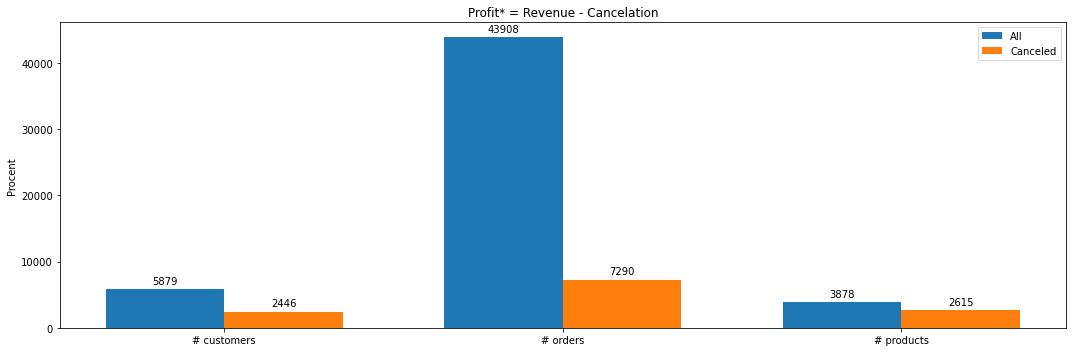

In [31]:
h.plot_canceled(df)

- Niebieski słupek to przychody
- Pomarańczowy to zwroty

Mamy co najmniej trzy wymiary:
- klienci (`customer`)
- zamówienia (`orders`) 
- produkty (`products`)

Zobacz, jeśli chodzi o klientów to mamy proporcję: 5879 vs 2446. To brzmi, że co najmniej 2446 klientów zrobiło zwrot co najmniej raz (ale może częściej, do tego jeszcze warto wrócić). To brzmi, że ok. 41% zwraca.

Jeśli chodzi o zamówienia, to widać, że mniejszość jest zwracana. Mamy proporcję: 43 908 vs 7 290. Innymi słowy, tylko ~17% zamówień jest zwracana.


## 😇 Włączmy myślenie kreatywne

Popatrz teraz na wymiar produktów i spróbuj zrobić samodzielne wnioski.  Co to oznacza dla sklepu?


## 🤝🗣️ Uruchom kooperację i komunikację

Podziel się swoimi przemyśleniami na slacku [dwthon_day2_ideas](https://bit.ly/3vfem3w).

--- 
## 🧠 Włączmy myślenie krytycznie

Powyżej liczyliśmy, ile zapłacił klient. Swoją drogą ta metryka nazywa się `LTV` czyli `Lifetime Value` i oznacza, ile klient wyda w sklepie za cały czas. To jest ważny parametr, który warto umieć wyliczyć. To wcale nie jest łatwo zrobić, ale ML może tu pomóc.

Tylko zwróć uwagę, że to może być tylko wycinek `LTV`. Bo nie mamy gwarancji, że mamy historię od początku (bo może wtedy był inny sklep, inna baza i wiele innych rzeczy odmiennych) oraz nie wiemy, czy to koniec. Być może Zośka dopiero się rozkręca i wyda jeszcze 10 razy tyle, co do tej pory. To akurat jest bardzo trudne umieć powiedzieć, kiedy dany klient już więcej nie wróci... Natomiast trzeba zdawać sobie z tego sprawę, że takie momenty są.

## 😇 Włączmy myślenie kreatywne

Pomyśl, jak możemy zdefiniować, że klient już "nie wróci". Jak do tego można podejść, oprócz tego,  że zadzwonimy i zapytamy wprost (co też jest słabe, bo człowiek zawsze może zmienić zdanie, po to jest człowiekiem) jak również sama procedura jest niewygodna (po co męczyć klientów) oraz kosztowna (ile trzeba ludzi, aby 📞 zadzwonić do tysiący osób i spędzić z nimi nawet 10-15 min)?


Jeszcze raz zadajmy pytanie: **jak możemy zdefiniować, że klient dokonał ostatniego zakupu w "sklepie"?**. Dlaczego ważne jest odpowiedzenie na to pytanie? 

Chcemy to wiedzieć, ponieważ wtedy wiemy, ile możemy "zainwestować" w klienta wydając na pozyskanie go. 


Ewentualnie, warto rozważyć, czy możemy aktywować klienta, który potencjalnie o nas "zapomniał" i jak to można zrobić mądrze?

## 🤝🗣️ Kooperacja i komunikacja

Podziel się swoimi przemyśleniami na slacku [dwthon_day2_ideas](https://bit.ly/3vfem3w).

## 🎂 Deser

Przygotowałem dla Ciebie pomocniczą funkcję, aby porobić wykresy i zobaczyć, jak rozkłada się wartość w trzech wymiarach:
- klienci, produkty, zamówienia;
- przychody, zyski;

Zbadajmy np. wykresy, które charakteryzują klientów.

Unikalnych klientów: 5879
22.5% to 1324 klientów


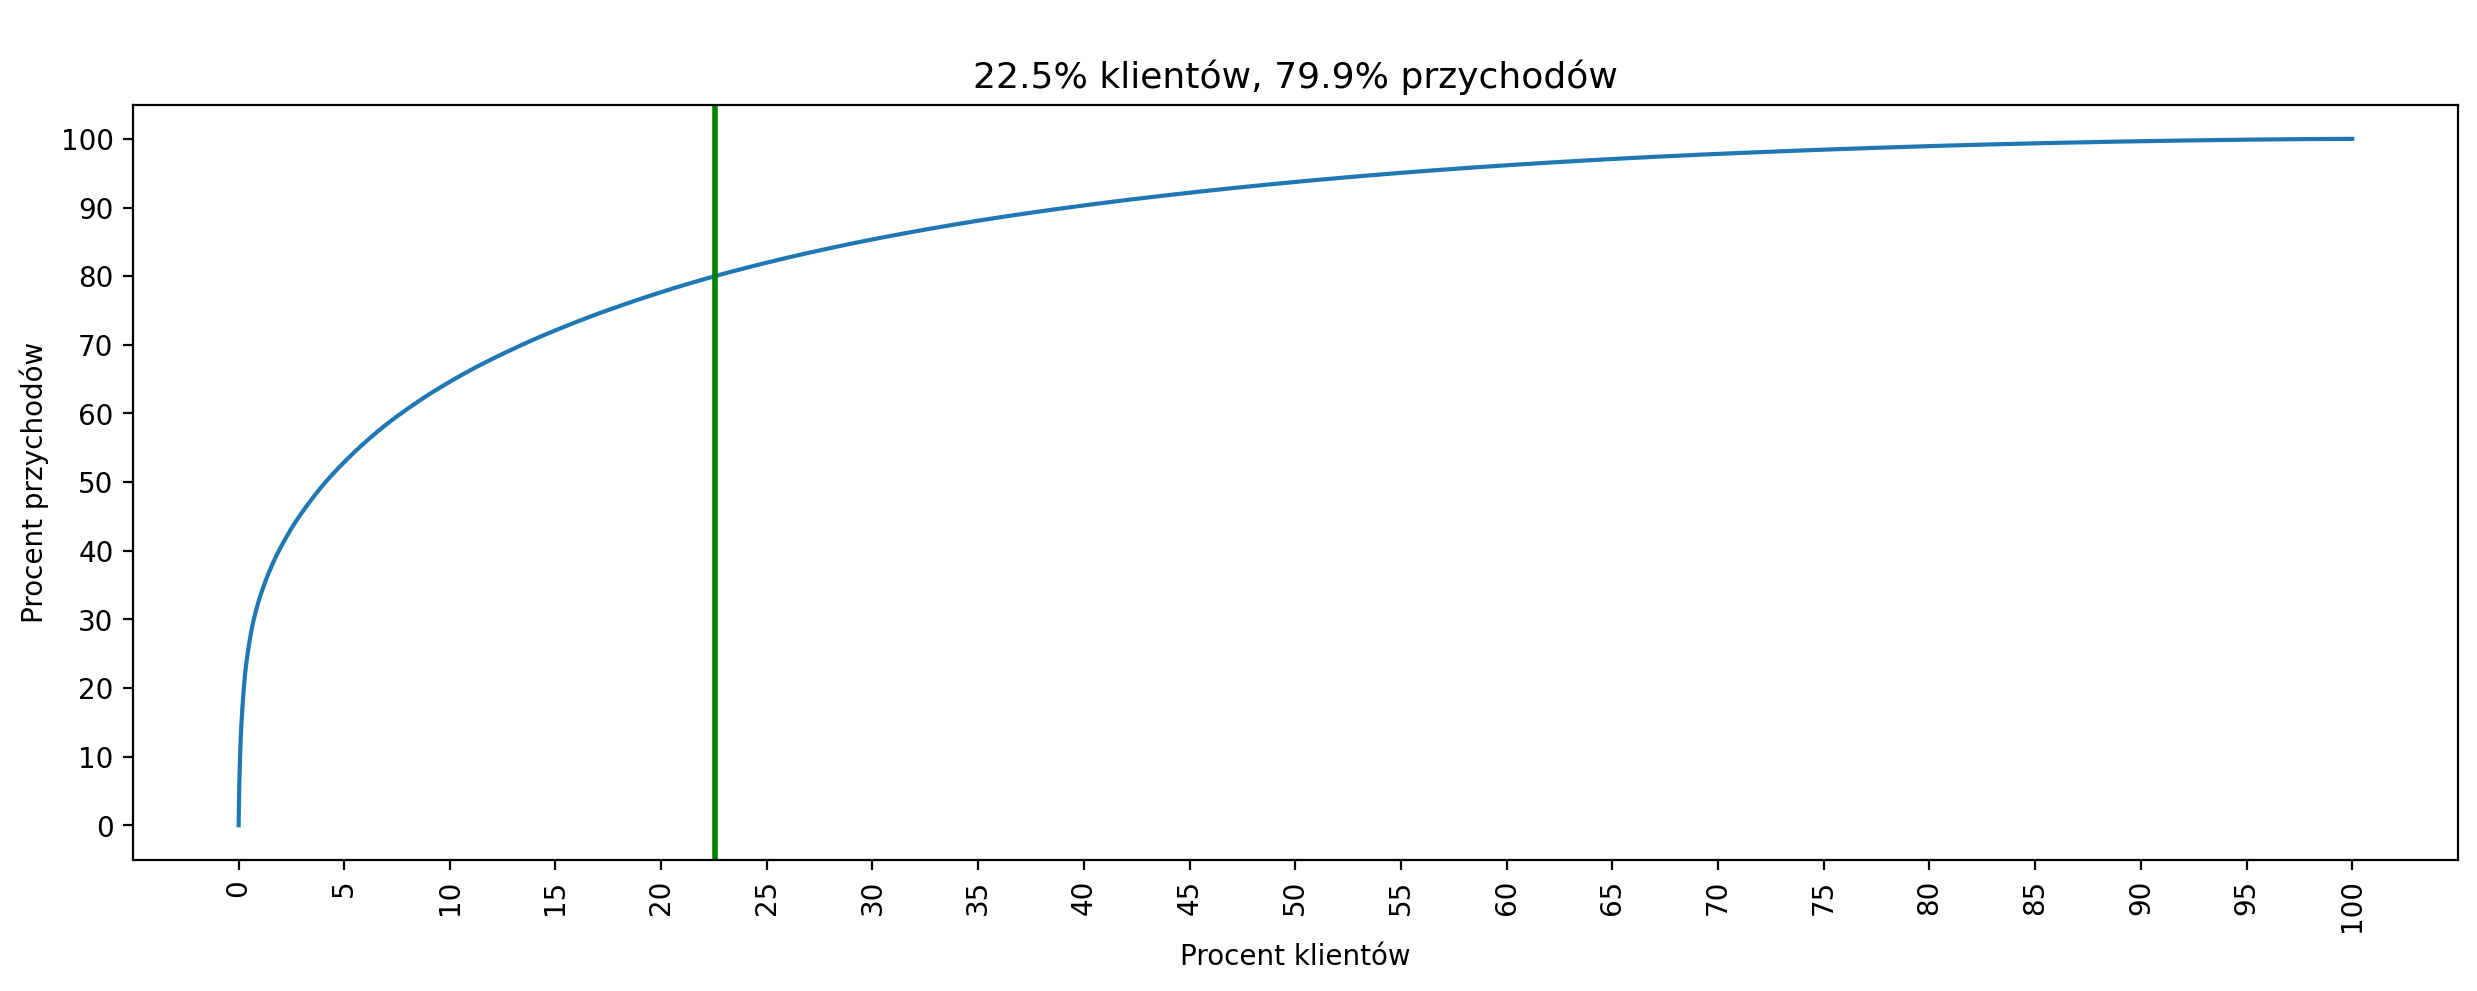

In [32]:
args = {
    'df': df,
    'sel_x_prct': 'auto_80',
    'main_feat': 'customer_id', 
    'price_feat': 'price_total', 
}

h.plot_pareto(**args)

- Na osi X masz w % klientów
- Na osi Y masz w % przychód

Zielona pionowa kreska pokazuje miejsca, gdzie osiągamy 80% przychodu. W tym przypadku mamy ok. 22.5% klientów, którzy  generują 80% przychodów.

Sprawdźmy teraz to samo tylko dla produktów.

Unikalnych produktów: 3878
23.799999999999997% to 925 produktów


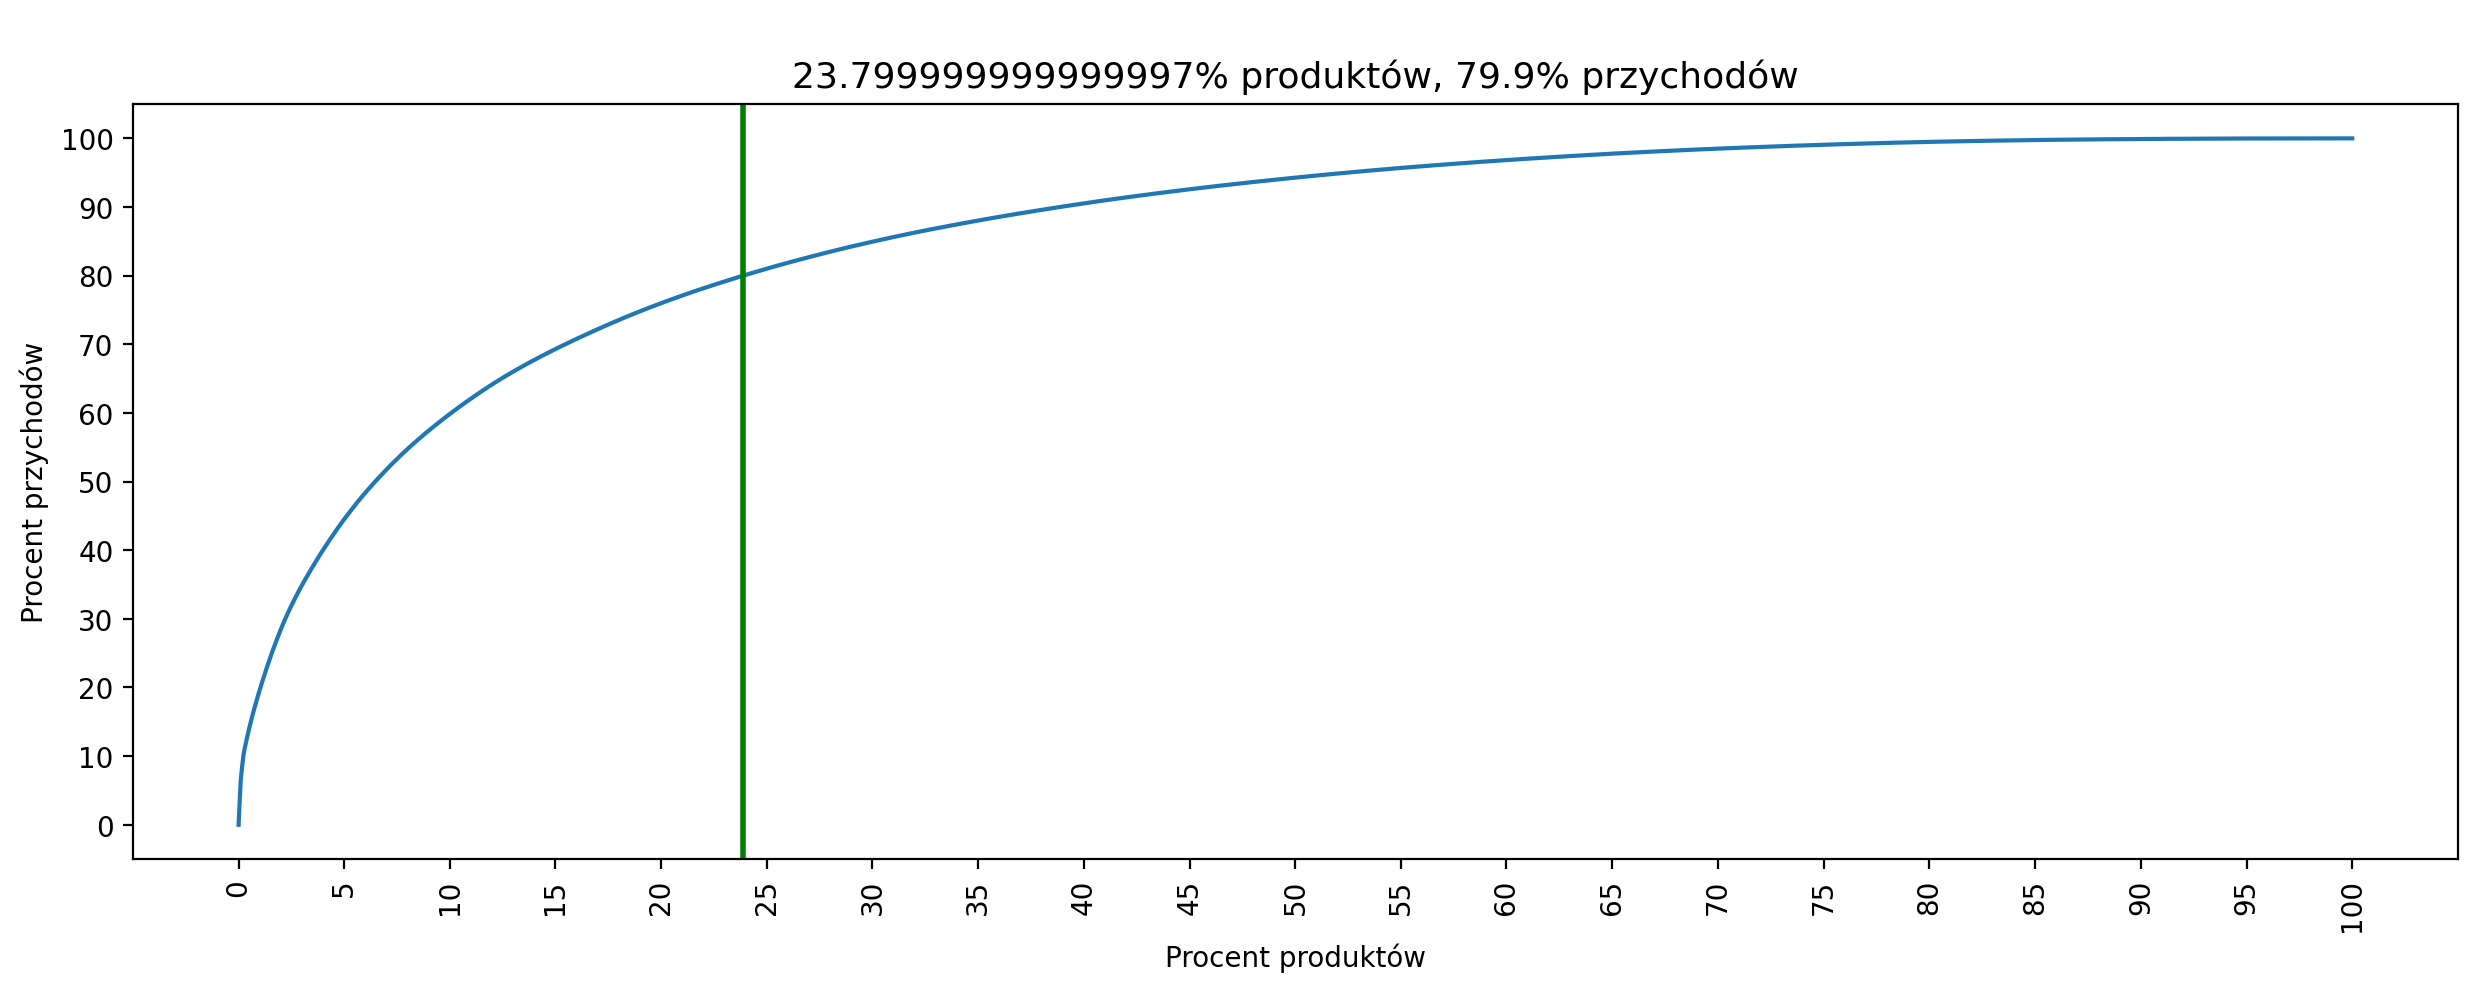

In [33]:
args = {
    'df': df,
    'sel_x_prct': 'auto_80',
    'main_feat': 'product_id', 
    'price_feat': 'price_total', 
}

h.plot_pareto(**args)

Zobaczmy wykres dla zamówień :) 

Unikalnych zamówień: 43908
38.800000000000004% to 17042 zamówień


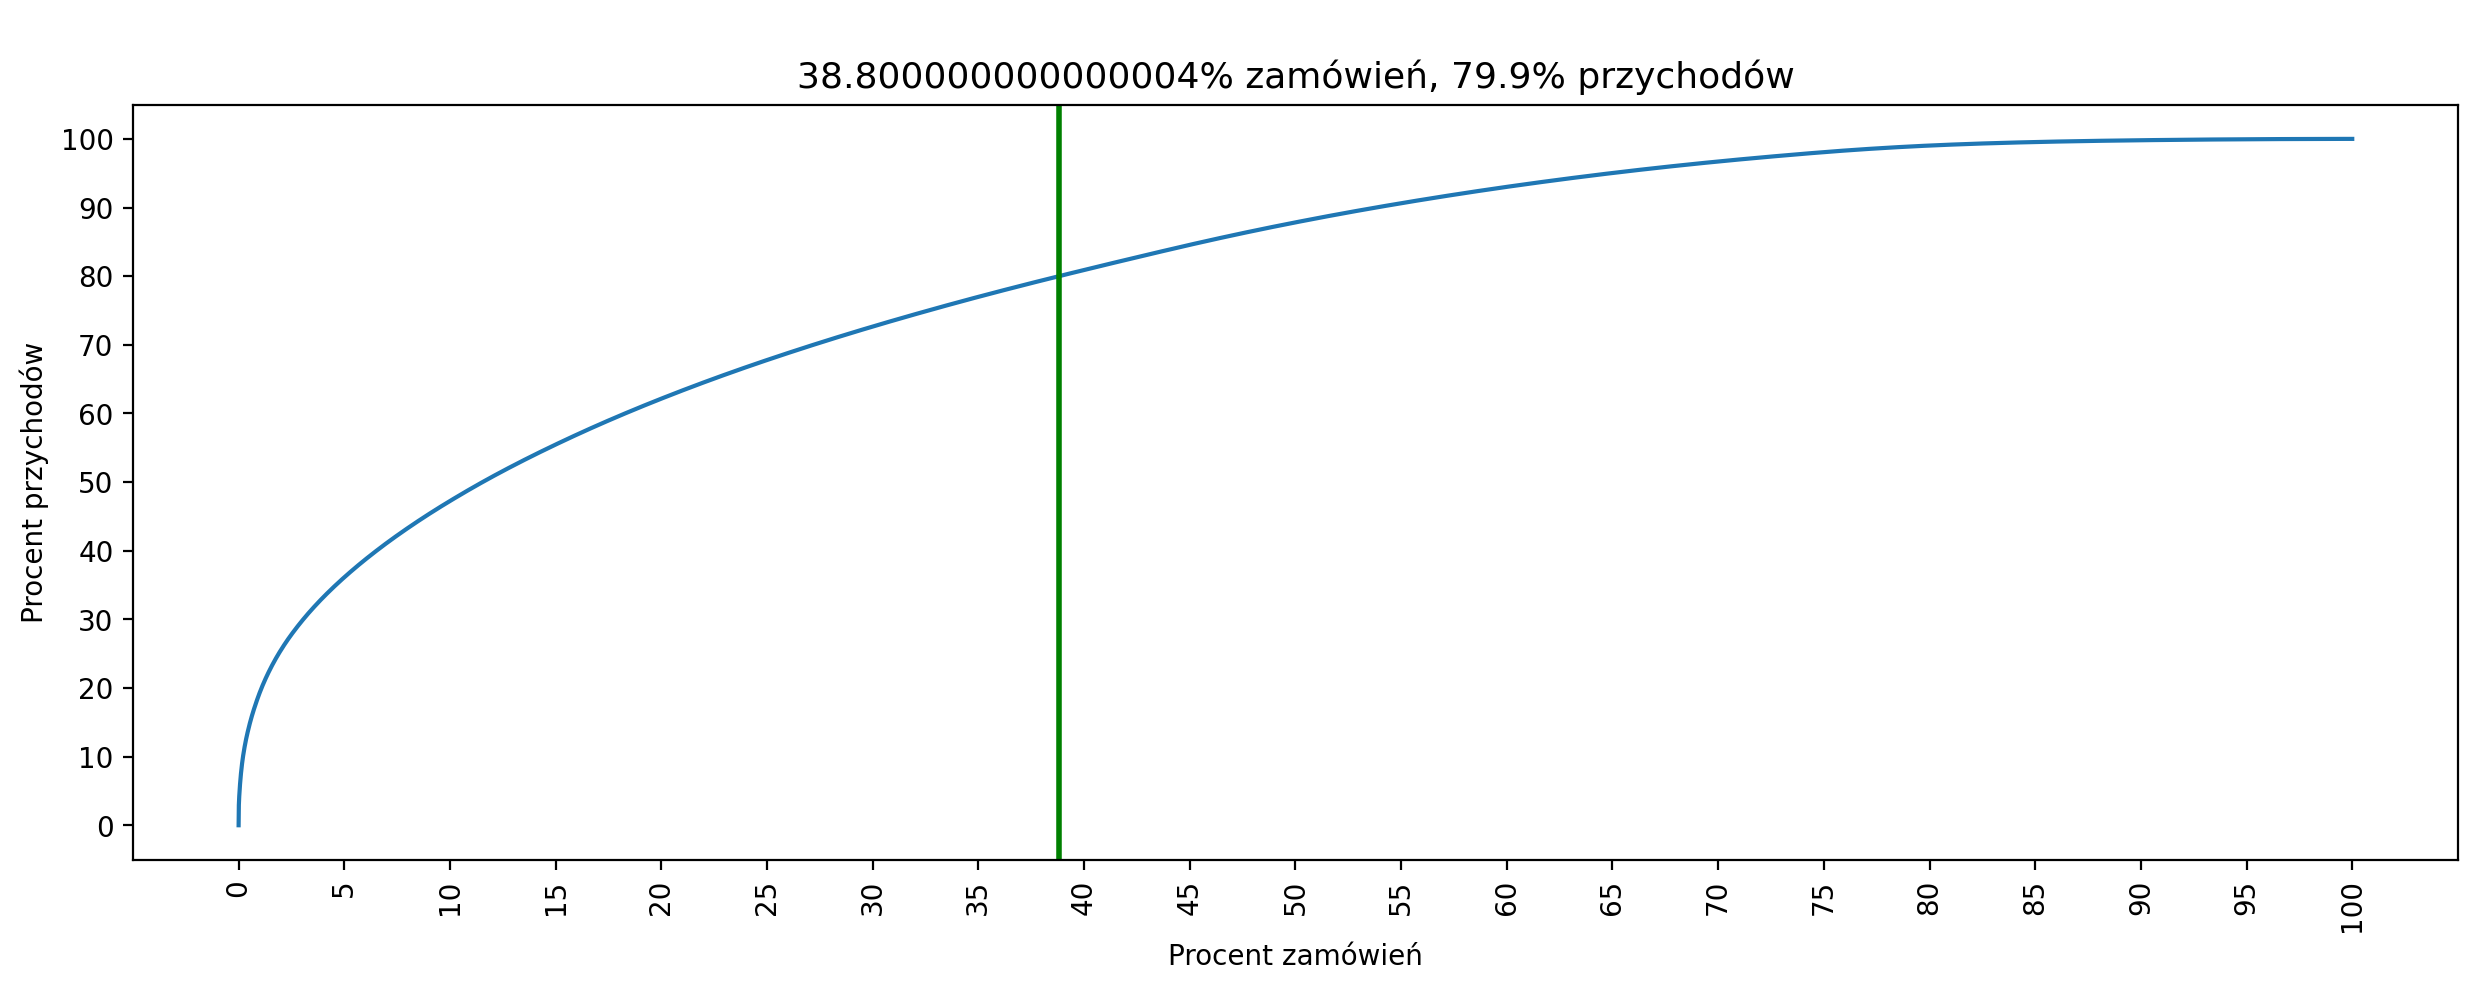

In [34]:
args = {
    'df': df,
    'sel_x_prct': 'auto_80',
    'main_feat': 'order_id', 
    'price_feat': 'price_total', 
}

h.plot_pareto(**args)

W tym przypadku jest tak, że ok. 39% zamówień musi się wydarzyć, abyśmy mogli wytworzyć wartość 80%. Nadal 39% to mniejszość ;)

Zapraszam na slacka :) 